#Sentiment Analysis of Products Reviews

#### **Contents**

1. Business Understanding
2. Data Understanding
3. Data Preprocessing
4. Exploratory Data Analysis
5. Text Processing
6. Modeling
7. Conclusions
8. Recommendations

****

## **1. Business Understanding**

**Context**

Amazon company released various products like the Kindle, Fire TV, etc. This dataset consists of over 20,000 reviews of Amazon products. This dataset includes basic product information, rating, review text, and more for each product.


**Goal**

We identify and analyze consumer of Amazon products reviews.

In order to gauge customer's response to the products, sentiment analysis can be performed.


**Dataset**

Subset of Amazon products reviews dataset from https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data


## **2. Data Understanding**

In [ ]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/amazon_reviews.csv')

# Check data contents
data.head()

Mounted at /content/drive


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [ ]:
# Check null value from dataset
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           5
sourceURLs                 0
dtype: int64

In [ ]:
# Check duplicate value
data.duplicated().sum()

0

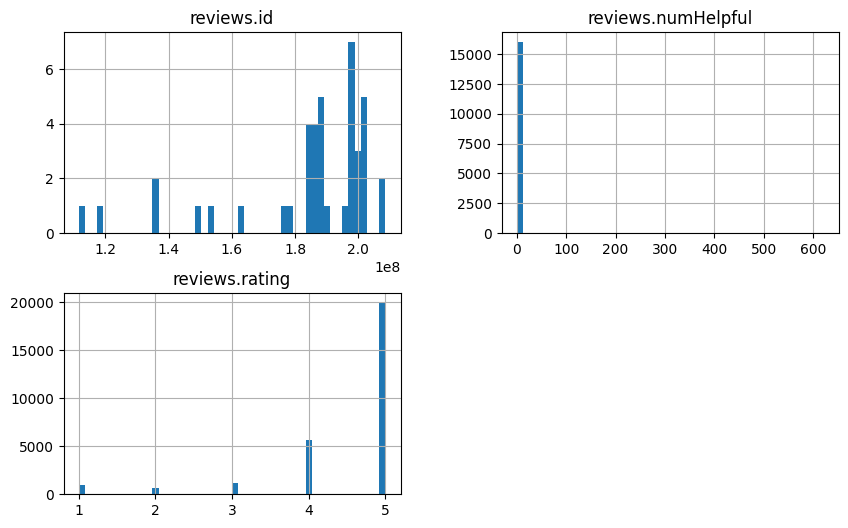

In [ ]:
# Histogram of numerical variables
data.hist(bins=50, figsize=(10,6));

In [ ]:
# Categorical variables
def get_unique(data):
    cat_cols = data.select_dtypes(exclude="number")
    uni_values = []
    counts = []
    pct = []

    for col in cat_cols.columns:
        uni_value, count = np.unique(
            np.array(cat_cols[col], dtype=str), return_counts=True
        )
        uni_values.append(uni_value)
        counts.append(count)
        pct.append(np.round(count / count.sum() * 100, 2))

    return pd.DataFrame(
        {
            "dtype": cat_cols.dtypes,
            "unique_values": uni_values,
            "counts": [len(val) for val in uni_values],
            "values_count": counts,
            "pct": pct,
        }
    )
get_unique(data)

,dtype,unique_values,counts,values_count,pct
id,object,"[AV-ETMhgYSSHbkXwpNb9, AV-EVZITKZqtpbFMSoqc, A...",65,"[4, 22, 1, 1, 6, 4, 4, 3728, 5, 25, 39, 2, 9, ...","[0.01, 0.08, 0.0, 0.0, 0.02, 0.01, 0.01, 13.16..."
dateAdded,object,"[2014-08-28T19:31:47Z, 2014-10-28T11:14:38Z, 2...",55,"[6, 4, 21, 6, 25, 5, 1, 4, 8343, 9, 9, 6, 6, 1...","[0.02, 0.01, 0.07, 0.02, 0.09, 0.02, 0.0, 0.01..."
dateUpdated,object,"[2019-02-23T02:49:38Z, 2019-02-24T04:01:52Z, 2...",52,"[2443, 5, 6, 7, 8, 1499, 156, 1425, 84, 987, 1...","[8.62, 0.02, 0.02, 0.02, 0.03, 5.29, 0.55, 5.0..."
name,object,"[All-New Fire 7 Tablet with Alexa, 7"" Display,...",65,"[82, 233, 293, 883, 160, 2370, 67, 140, 156, 1...","[0.29, 0.82, 1.03, 3.12, 0.56, 8.37, 0.24, 0.4..."
asins,object,"[B0002LCUZK,B010CEC6MI,B01B25NN64, B001NIZB5M,...",65,"[9, 5, 6, 9, 5, 5, 4, 4, 21, 25, 6, 505, 36, 6...","[0.03, 0.02, 0.02, 0.03, 0.02, 0.02, 0.01, 0.0..."
brand,object,"[Amazon, AmazonBasics, Amazonbasics]",3,"[16153, 10, 12169]","[57.01, 0.04, 42.95]"
categories,object,"[AA,AAA,Electronics Features,Health,Electronic...",60,"[3728, 8343, 6, 601, 2, 13, 5, 1, 5, 3, 5, 4, ...","[13.16, 29.45, 0.02, 2.12, 0.01, 0.05, 0.02, 0..."
primaryCategories,object,"[Animals & Pet Supplies, Electronics, Electron...",9,"[6, 13995, 2, 185, 12071, 2, 9, 386, 1676]","[0.02, 49.4, 0.01, 0.65, 42.61, 0.01, 0.03, 1...."
imageURLs,object,[http://ecx.images-amazon.com/images/I/41PnK8s...,65,"[6, 6, 4, 4, 1, 1, 21, 1, 1, 2370, 1024, 3, 23...","[0.02, 0.02, 0.01, 0.01, 0.0, 0.0, 0.07, 0.0, ..."
keys,object,"[0841710155549,amazonbasicssiliconehothandleco...",65,"[1, 4, 6, 5, 5, 287, 987, 115, 7, 22, 6, 6, 1,...","[0.0, 0.01, 0.02, 0.02, 0.02, 1.01, 3.48, 0.41..."


## **3. Data Preprocessing**

In [ ]:
# copy data
df = data.copy()

To see if majority of the customer ratings are positive or negative, the data that will be using most for this analysis is **'reviews.rating'**, **'reviews.text'**, and **'reviews.title'**

In [ ]:
df = df[['dateUpdated', 'name', 'reviews.text', 'reviews.title', 'reviews.rating']]
df.rename(columns={'dateUpdated':'dateupdated', 'reviews.text':'reviews_text', 'reviews.title':'reviews_title', 'reviews.rating':'reviews_rating'}, inplace=True)
df.head()

,dateupdated,name,reviews_text,reviews_title,reviews_rating
0,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


## **4. Exploratory Data Analysis**

**Product Ratings**

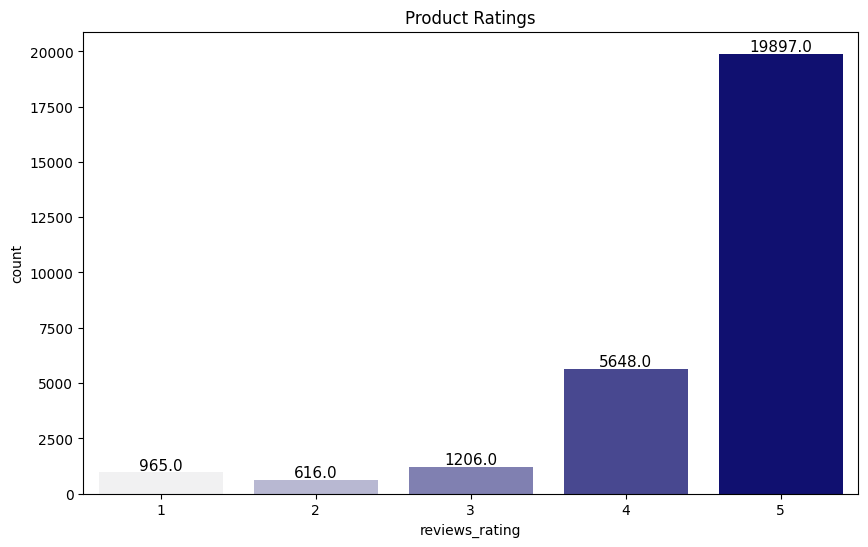

In [ ]:
# create bar of product ratings
plt.figure(figsize=(10,6))
plt.title("Product Ratings");

# add data labels to each bar
colors = sns.light_palette("navy", reverse=False, as_cmap=True)
rx = sns.countplot(data=df, x='reviews_rating', hue='reviews_rating', palette=colors, legend=False)
for p in rx.patches:
    rx.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, xytext=(0, 5),
                textcoords='offset points')

Most of the customer rating is 5.

**Positive and Negative Sentiments**

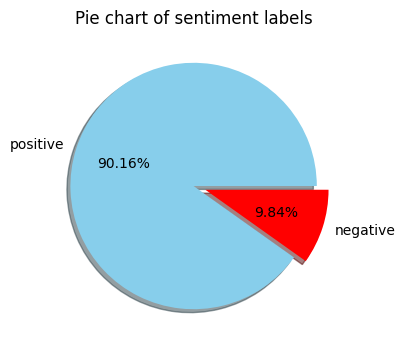

In [ ]:
# assign reviews with rating > 3 as positive sentiment
# assign reviews with rating < 4 negative sentiment
df['sentiment'] = df['reviews_rating'].apply(lambda rating : +1 if rating >= 4 else -1)

sentiment_count = df['sentiment'].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    sentiment_count,
    autopct="%.2f%%",
    labels=['positive', 'negative'],
    colors=["skyblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of sentiment labels")
plt.show()

Our model will only classify positive and negative reviews : 90.16% positive and 9.84% negative.

In [ ]:
df.head()

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment
0,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,-1
1,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,1
2,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,1
3,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,1
4,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,1


**Sentiment Overtime**

In [ ]:
from datetime import datetime

# date type conversion
df['dateupdated'] = df['dateupdated'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

# df['dateupdated'].dt.month.unique()
# df['dateupdated'].dt.year.unique()
# df = 02, 03, 04 (February, March, April) 2019

In [ ]:
# month
df['Month'] = df['dateupdated'].dt.month
df['Month'] = df['Month'].apply(lambda month : "February" if month == 2 else 'March' if month == 3 else "April")

# monthly sentiments
monthly_counts = df.groupby(by='Month')['sentiment'].value_counts().unstack(fill_value=0)
monthly_counts = monthly_counts.reindex(index=['February', 'March', 'April'])
print(monthly_counts)

sentiment    -1      1
Month                 
February    617   8455
March       419   5983
April      1751  11107


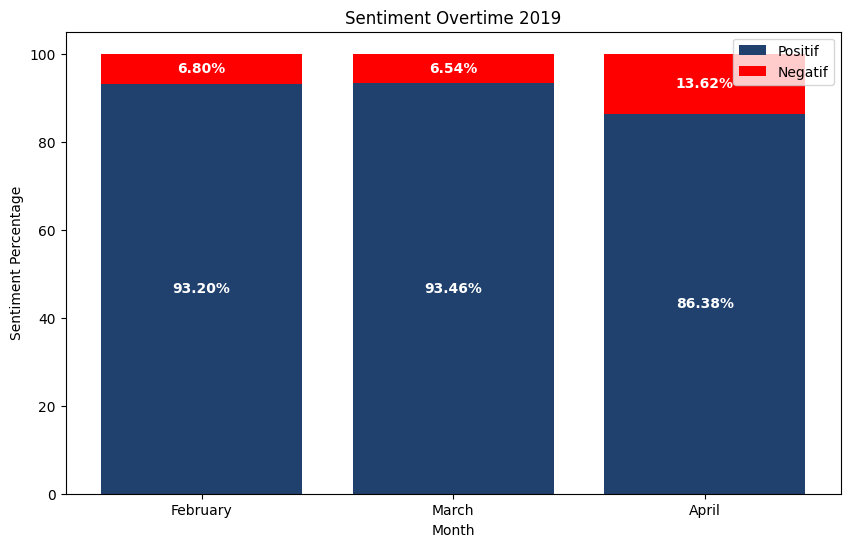

In [ ]:
# calculate the monthly sentiment count
monthly_counts = df.groupby(by='Month')['sentiment'].value_counts().unstack(fill_value=0)
monthly_counts = monthly_counts.reindex(index=['February', 'March', 'April'])

# calculate total of sentiment per month
monthly_total = monthly_counts.sum(axis=1)

# calculate sentiments percentage
monthly_percent_positive = (monthly_counts[1] / monthly_total) * 100
monthly_percent_negative = (monthly_counts[-1] / monthly_total) * 100

# create bar graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_percent_positive, label='Positif', color='#20406e')
plt.bar(monthly_counts.index, monthly_percent_negative, bottom=monthly_percent_positive, label='Negatif', color='red')

# add label on the bar
for month, pos, neg in zip(monthly_counts.index, monthly_percent_positive, monthly_percent_negative):
    plt.text(month, pos / 2, f'{pos:.2f}%', ha='center', va='center', color='white', fontweight='bold')
    plt.text(month, pos + neg / 2, f'{neg:.2f}%', ha='center', va='center', color='white', fontweight='bold')

# add label and title
plt.xlabel('Month')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Overtime 2019')
plt.legend()

# show graph
plt.show()

**Top 10 Products**

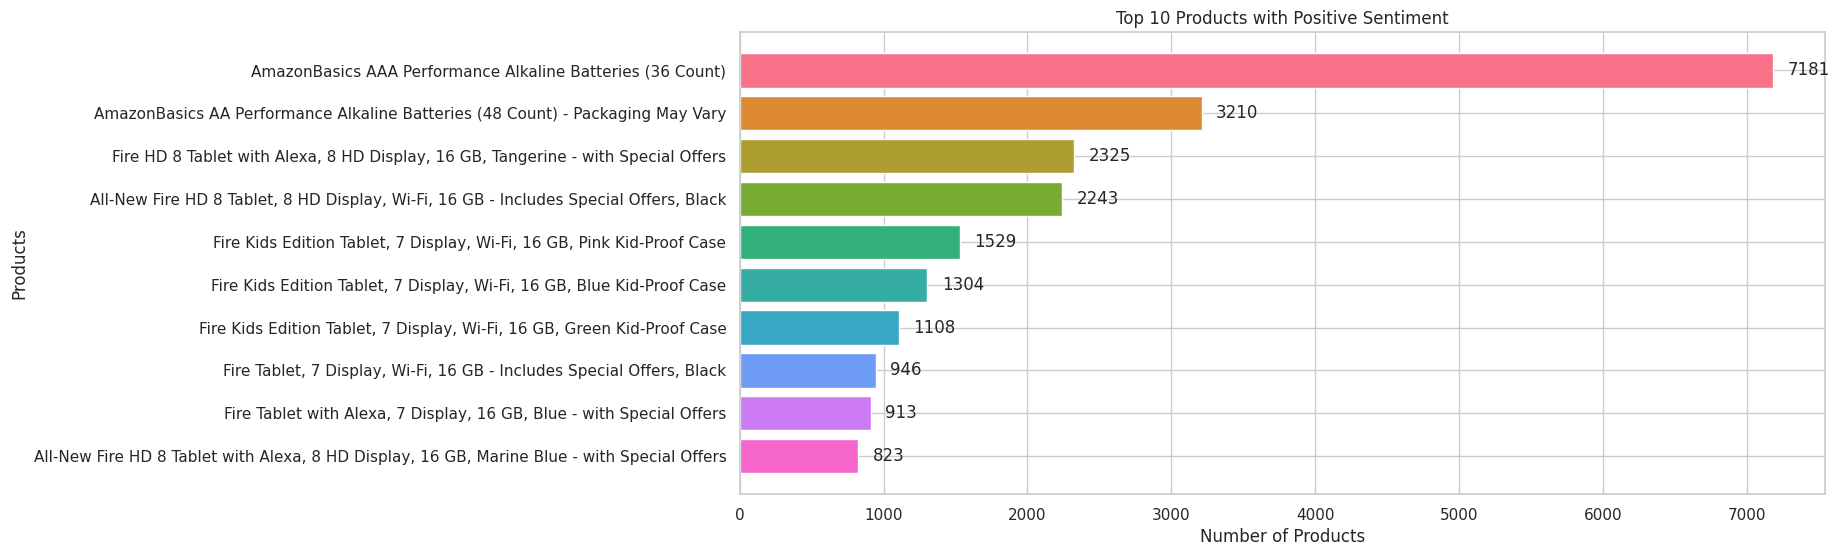

In [ ]:
# top Product -- positive sentiment
# filter product with rating 4 and 5
df_positive = df[df['sentiment'].isin([1])]

# frequence of each product
name_counts_positive = df_positive['name'].value_counts()

# top 10 products -- positive sentiment
top_positive = name_counts_positive.nlargest(10)
products_positive = top_positive.index
counts_positive = top_positive.values

# create plot
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
num_colors = len(products_positive)
palette = sns.color_palette('husl', num_colors)
bars = plt.barh(products_positive, counts_positive, color=palette)

# add count label
for bar, count in zip(bars, counts_positive):
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, f'{count}', va='center')

# add tittle and xy label
plt.xlabel('Number of Products')
plt.ylabel('Products')
plt.title('Top 10 Products with Positive Sentiment')

# show plot
plt.gca().invert_yaxis()  # invert y
plt.show()

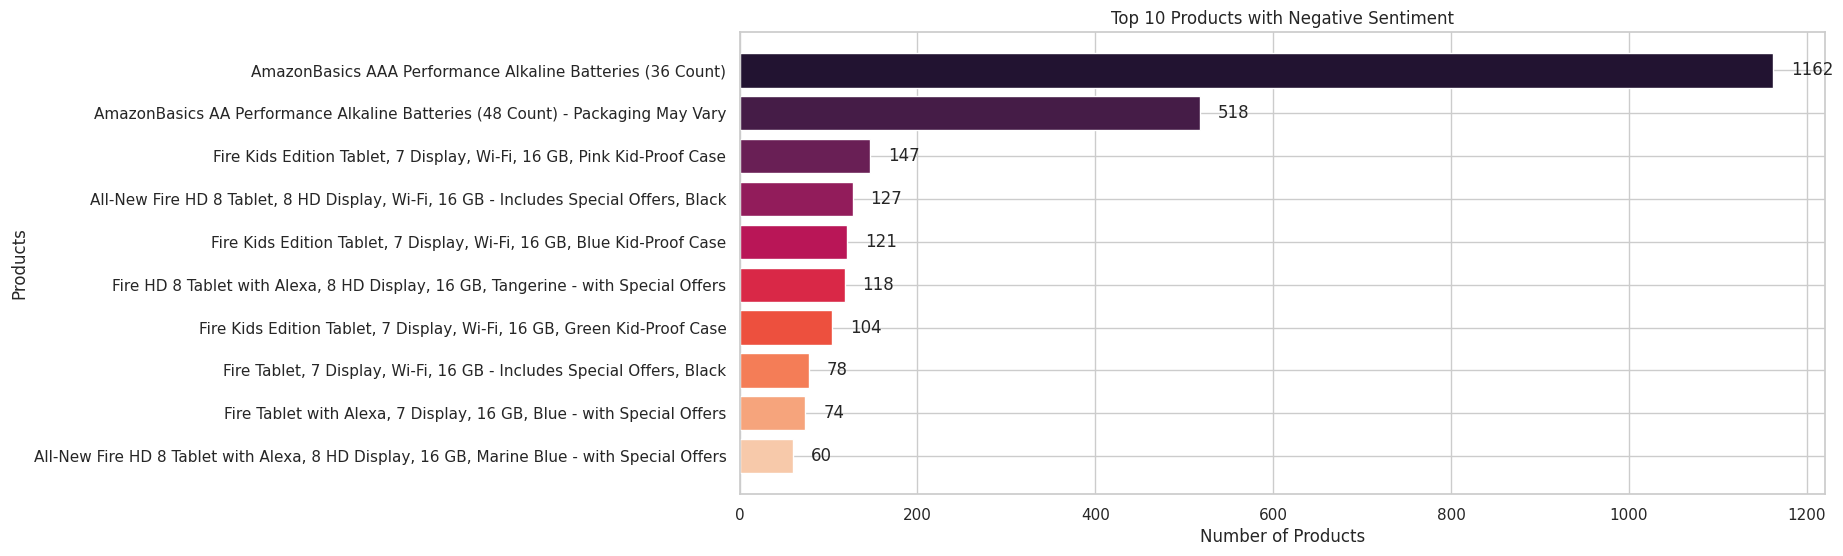

In [ ]:
# top Product -- negative sentiment
# filter product with rating 1, 2, and 3
df_negative = df[df['sentiment'].isin([-1])]

# frequence of each product
name_counts_negative = df_negative['name'].value_counts()

# top 10 products -- positive sentiment
top_negative = name_counts_negative.nlargest(10)
products_negative = top_negative.index
counts_negative = top_negative.values

# create plot
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
num_colors = len(products_negative)
palette_negative = sns.color_palette('rocket', num_colors)
bars = plt.barh(products_negative, counts_negative, color=palette_negative)

# add count label
for bar, count in zip(bars, counts_negative):
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, f'{count}', va='center')

# add tittle and xy label
plt.xlabel('Number of Products')
plt.ylabel('Products')
plt.title('Top 10 Products with Negative Sentiment')

# show plot
plt.gca().invert_yaxis()  # invert y
plt.show()

**Review the number of words and letters**

In [ ]:
df_check = df.copy()

In [ ]:
df_check["words_text"]=df_check["reviews_text"].apply(lambda x: len(x.split()))
df_check.sort_values(by="words_text", ascending=False, inplace=True)
df_check.head(5)

# highest number of words in 1 reviews_text = 1539 words

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,words_text
24278,2019-02-25 02:04:25,"Fire HD 8 Tablet with Alexa, 8 HD Display, 32 ...","I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4,1,February,1539
15434,2019-03-09 07:13:43,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4,1,March,1539
15435,2019-03-09 07:13:43,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4,1,March,1539
18411,2019-03-03 02:47:22,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4,1,March,1539
7903,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,The Amazon product line seems to have decent p...,Very good for the price,4,1,April,888


In [ ]:
df_check.sort_values(by="words_text", ascending=True, inplace=True)
df_check.head(5)

# there are some reviews_text with 1 word, 2 words, etc

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,words_text
2080,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,grea,Five Stars,5,1,April,1
4200,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Thanks,Four Stars,4,1,April,1
6011,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Perfect!,I want a hippopotamus for Christmas....,5,1,April,1
9595,2019-04-24 02:17:42,AmazonBasics AA Performance Alkaline Batteries...,Great.,Five Stars,5,1,April,1
8963,2019-04-24 02:17:42,AmazonBasics AA Performance Alkaline Batteries...,awesome,Five Stars,5,1,April,1


In [ ]:
df_check["letters_text"]=df_check["reviews_text"].apply(len)
df_check.sort_values(by="letters_text", ascending=True, inplace=True)
df_check.head(5)

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,words_text,letters_text
7590,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,1,Three Stars,3,-1,April,1,1
8381,2019-04-24 02:17:42,AmazonBasics AA Performance Alkaline Batteries...,d,a,5,1,April,1,1
1674,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,F,Five Stars,5,1,April,1,1
6609,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,ok,ok,5,1,April,1,2
3074,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,ok,Five Stars,5,1,April,1,2


In [ ]:
# filter rows where reviews_text is "ok" and sentiment is 1 (positive)
positive_reviews_ok = df_check.loc[(df_check['reviews_text'] == 'ok') & (df_check['sentiment'] == 1)]

# filter rows where reviews_text is "ok" and sentiment is -1 (negative)
negative_reviews_ok = df_check.loc[(df_check['reviews_text'] == 'ok') & (df_check['sentiment'] == -1)]

# concatenate the results for positive and negative reviews
reviews_ok = pd.concat([positive_reviews_ok, negative_reviews_ok])

# display the result
print(reviews_ok)

# there are reviews_text "ok" in sentiment positive and negative

              dateupdated                                               name  \
6609  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
3074  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
3071  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
4145  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
8173  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
4136  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
10270 2019-04-24 02:17:42  AmazonBasics AA Performance Alkaline Batteries...   
10271 2019-04-24 02:17:42  AmazonBasics AA Performance Alkaline Batteries...   
10274 2019-04-24 02:17:42  AmazonBasics AA Performance Alkaline Batteries...   
3075  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
4137  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
3070  2019-04-25 09:08:16  AmazonBasics 

**Wordclouds**

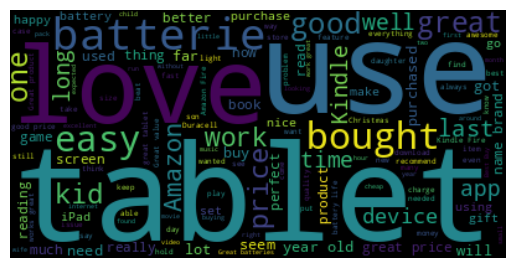

In [ ]:
# wordclouds
# we can create some wordclouds to see the most frequently used words in the reviews
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# product reviews_text
stopwords = set(STOPWORDS)
all_text = " ".join(review for review in df['reviews_text'])
wordcloud = WordCloud(stopwords=stopwords).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

# some popular words that can be observed here include “tablet", "use", “batterie", "love”, "bought"

Some popular words that can be observed here include “five", "star", “tablet", "great” and "love".

In [ ]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

**Positive Reviews**

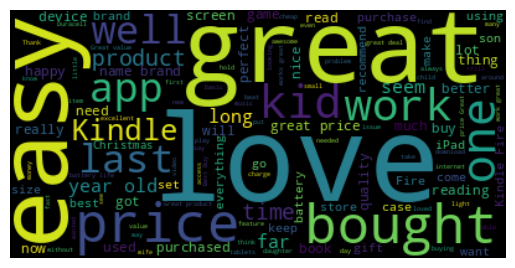

In [ ]:
# wordcloud -- positive sentiment
stopwords = set(STOPWORDS)
stopwords.update(["batterie", "tablet", "batteries", "use", "amazon", "good"])
pos_text = " ".join(review for review in positive.reviews_text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos_text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# "good" include in positive and negative sentiment, there are "good" and "not good"
# some popular words that can be observed here include "love", "great", "easy", "price"

**Negative Reviews**

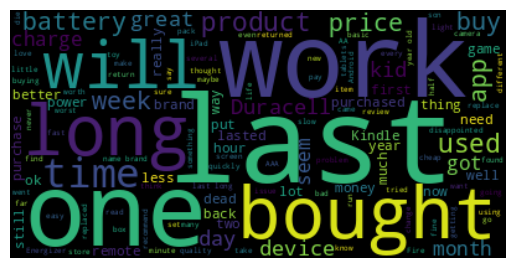

In [ ]:
# wordcloud -- negative sentiment
stopwords = set(STOPWORDS)
stopwords.update(["batterie", "tablet", "batteries", "use", "amazon", "good"])
neg_text = " ".join(review for review in negative.reviews_text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg_text)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

# some popular words that can be observed here include "last", "one", "work", "long"

## **5. Text Processing**

1. Remove links
3. Remove hyperlinks and markups
4. Unify whitespaces
5. Remove non-alphabetic characters using regular expression
6. Remove punctuation, convert to lowercase
7. Join the characters again to form the string
8. Remove stop words using ntlk library
9. Remove nonsensical words (troll messages) defined as having more
10. Check if text is empty after cleaning


In [ ]:
# import relevant libraries
import re
from string import punctuation
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text):
  # remove links
  text = re.sub(r'http\S+', '', text)

  # remove hyperlinks and markups
  text = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', text)
  text = re.sub('&gt;', "", text)
  text = re.sub('&#x27;', "'", text)
  text = re.sub('&quot;', '"', text)
  text = re.sub('&#x2F;', ' ', text)
  text = re.sub('<p>', ' ', text)
  text = re.sub('</i>', '', text)
  text = re.sub('&#62;', '', text)
  text = re.sub('<i>', ' ', text)
  text = re.sub("\n", ' ', text)

  # unify whitespaces
  text = re.sub(' +', ' ', text)

  # remove non-alphabetic characters
  text = re.sub(r"[^a-zA-Z?!.,]+", ' ', text)

  # remove punctuation, convert to lowercase
  nopunc = [char.lower() for char in text if char not in punctuation]

  # join the characters again to form the string
  nopunc = ''.join(nopunc)

  # remove stop words
  text = nopunc.split()
  no_stopword = [word for word in text if word not in (stopwords.words('english'))]
  word = ' '.join(no_stopword)

  # remove nonsensical words (troll messages) defined as having more than 5 consecutive consonants
  text = re.sub(r'\w*[^aeiouAEIOU\W]{5}\w*', '', word)

  # check if text is empty after cleaning
  if text=='':
    return np.nan
  else:
    return text

In [ ]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?!, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
cleaned = clean_text(text)
print(cleaned)

   This is a message to be cleaned. It may involve some things like: <br>, ?!, :, ''  26 adjacent spaces and tabs     .   

message cleaned may involve things like br adjacent spaces tabs


In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month
0,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,-1,April
1,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,1,April
2,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,1,April
3,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,1,April
4,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,1,April


In [ ]:
# clean text
df1['clean_text'] = df1['reviews_text'].apply(clean_text)

In [ ]:
# check some processed reviews
import random

i = random.choice(range(len(df)))

print(f"Original review: \n{df1['reviews_text'].iloc[i]}\n")
print(f"Processed review: \n{df1['clean_text'].iloc[i]}")

Original review: 
I like the tablet; however, there are occasions when it does not boot up when it is turned on. I probably need to take it into the store so that a determination can be made and it can be fixed.

Processed review: 
like tablet however occasions boot turned probably need take store determination made fixed


In [ ]:
# check empty clean_text
df1[df1.isna().any(axis=1)]

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,clean_text
1196,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,: ),Five Stars,5,1,April,NaN
1197,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,:),Five Stars,5,1,April,NaN
1224,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A+,Five Stars,5,1,April,NaN
1225,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A+,Five Stars,5,1,April,NaN
1228,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A++,Five Stars,5,1,April,NaN
1229,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A+++,Five Stars,5,1,April,NaN
1230,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A++++,Five Stars,5,1,April,NaN
1231,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A++++,Five Stars,5,1,April,NaN
1232,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A++++,Five Stars,5,1,April,NaN
1233,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,A+++++,Five Stars,5,1,April,NaN


In [ ]:
df1.isnull().sum()

dateupdated        0
name               0
reviews_text       0
reviews_title      0
reviews_rating     0
sentiment          0
Month              0
clean_text        25
dtype: int64

In [ ]:
# drop empty clean_text
df1.dropna(inplace=True)

# check empty rows
df1.isna().sum()

dateupdated       0
name              0
reviews_text      0
reviews_title     0
reviews_rating    0
sentiment         0
Month             0
clean_text        0
dtype: int64

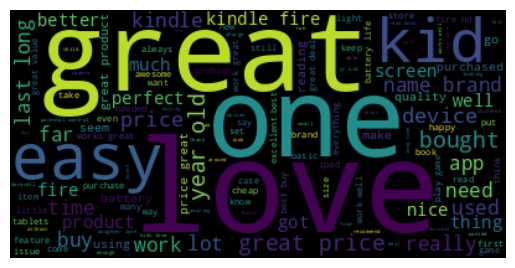

In [ ]:
# wordcloud again (positive)
stopwords = set(STOPWORDS)
stopwords.update(["batterie", "tablet", "batteries", "use", "amazon", "good"])
positive = " ".join(str(review) for review in df1[df1['sentiment'] == 1]['clean_text'])
wordcloud2 = WordCloud(stopwords=stopwords).generate(positive)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

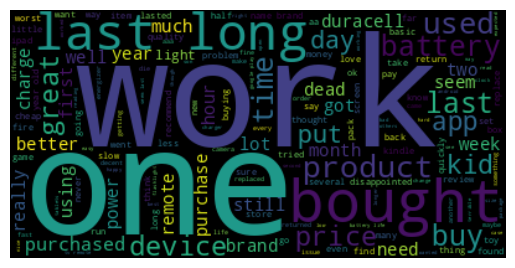

In [ ]:
# wordcloud again (negative)
stopwords = set(STOPWORDS)
stopwords.update(["batterie", "tablet", "batteries", "use", "amazon", "good"])
negative = " ".join(str(review) for review in df1[df1['sentiment'] == -1]['clean_text'])
wordcloud2 = WordCloud(stopwords=stopwords).generate(negative)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

**Sentiment from review_text**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28307 entries, 0 to 28331
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dateupdated     28307 non-null  datetime64[ns]
 1   name            28307 non-null  object        
 2   reviews_text    28307 non-null  object        
 3   reviews_title   28307 non-null  object        
 4   reviews_rating  28307 non-null  int64         
 5   sentiment       28307 non-null  int64         
 6   Month           28307 non-null  object        
 7   clean_text      28307 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.9+ MB


In [ ]:
from textblob import TextBlob

# function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    # Classify as positive if polarity is greater than 0, otherwise negative
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# apply the function to the 'clean_text' column
df1['label'] = df1['clean_text'].apply(classify_sentiment)

# display the updated dataframe
df1.head()

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,clean_text,label
0,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,-1,April,order one item bad quality missing backup spri...,negative
1,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,1,April,bulk always less expensive way go products like,negative
2,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,1,April,well duracell price happy,positive
3,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,1,April,seem work well name brand batteries much bette...,positive
4,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,1,April,batteries long lasting price great,positive


In [ ]:
if 'label' in df1:
    df1['label_sentiment'] = df1['label'].apply(lambda value: 1 if value == 'positive' else -1)

df1.head()

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,clean_text,label,label_sentiment
0,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,-1,April,order one item bad quality missing backup spri...,negative,-1
1,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,1,April,bulk always less expensive way go products like,negative,-1
2,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,1,April,well duracell price happy,positive,1
3,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,1,April,seem work well name brand batteries much bette...,positive,1
4,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,1,April,batteries long lasting price great,positive,1


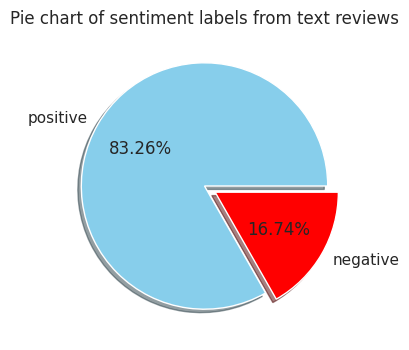

In [ ]:
label_sentiment_count = df1['label_sentiment'].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    label_sentiment_count,
    autopct="%.2f%%",
    labels=['positive', 'negative'],
    colors=["skyblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of sentiment labels from text reviews")
plt.show()

In [ ]:
rating_sentiment_pos = df1.query('sentiment == 1 and label_sentiment == -1')
df1_sentiment_pos = pd.DataFrame(rating_sentiment_pos)
df1_sentiment_pos

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,clean_text,label,label_sentiment
1,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,1,April,bulk always less expensive way go products like,negative,-1
22,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,They last as long as Duracell batteries in my ...,... my Xbox one controllers and none of them e...,5,1,April,last long duracell batteries xbox one controll...,negative,-1
23,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,they seemed to not last as long as other name ...,... not last as long as other name brand names...,4,1,April,seemed last long name brand names disappointed,negative,-1
38,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,These last as well as Energizer- half the price.,1/2 the price,5,1,April,last well energizer half price,negative,-1
48,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,"GOT THE 48 PACK, I USEDD THEM UP FASTER THAN I...",48 PACK BLISS!!!,4,1,April,got pack usedd faster thought wouldso im order...,negative,-1
...,...,...,...,...,...,...,...,...,...,...
28303,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",I just like reading amd playing games on it..B...,Works great,5,1,February,like reading amd playing games itbetter bulky ...,negative,-1
28312,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","the tablet is great, but all the advertising i...","works great, but.....",4,1,February,tablet great advertising annoying,negative,-1
28320,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Allows for reading of my Kindle lib and even p...,Worlks as advertised,4,1,February,allows reading kindle lib even plays games,negative,-1
28321,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",I bought it for kindle books and was amazed by...,Worth every dime!!,5,1,February,bought kindle books amazed overall features ki...,negative,-1


In [ ]:
rating_sentiment_neg = df1.query('sentiment == -1 and label_sentiment == 1')
df1_sentiment_neg = pd.DataFrame(rating_sentiment_neg)
df1_sentiment_neg

,dateupdated,name,reviews_text,reviews_title,reviews_rating,sentiment,Month,clean_text,label,label_sentiment
11,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,When I first started getting the Amazon basic ...,... first started getting the Amazon basic bat...,3,-1,April,first started getting amazon basic batteries r...,positive,1
24,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,These do not last long at all very cheap batte...,... not last long at all very cheap batteries ...,1,-1,April,last long cheap batteries happy,positive,1
29,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,these were under a light we thought they were ...,... there to fit the light when they arrived a...,3,-1,April,light thought fit light arrived nice company b...,positive,1
37,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,Just got them so i really wont kno for a few e...,... wont kno for a few eeeks or so how good th...,3,-1,April,got really wont kno eeeks good batteries,positive,1
42,2019-04-25 09:08:16,AmazonBasics AAA Performance Alkaline Batterie...,I put these batteries in 10 of the 12 window c...,17 less battery life than Duracell,3,-1,April,put batteries window candles bought put last d...,positive,1
...,...,...,...,...,...,...,...,...,...,...
28265,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned",1,-1,February,cheap run chrome stuff returned store,positive,1
28268,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Didn't have some of the features I was looking...,Wasn't for me,2,-1,February,features looking returned next day may good ot...,positive,1
28269,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",My Hulu plays perfectly..great volume. Kindle ...,"Watching videos, great..then..",2,-1,February,hulu plays volume kindle starts right able re...,positive,1
28285,2019-02-23 02:49:38,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Worked great but after awhile I wouldn't unloc...,Won't unlock,1,-1,February,worked great awhile unlock enter pin screen wo...,positive,1


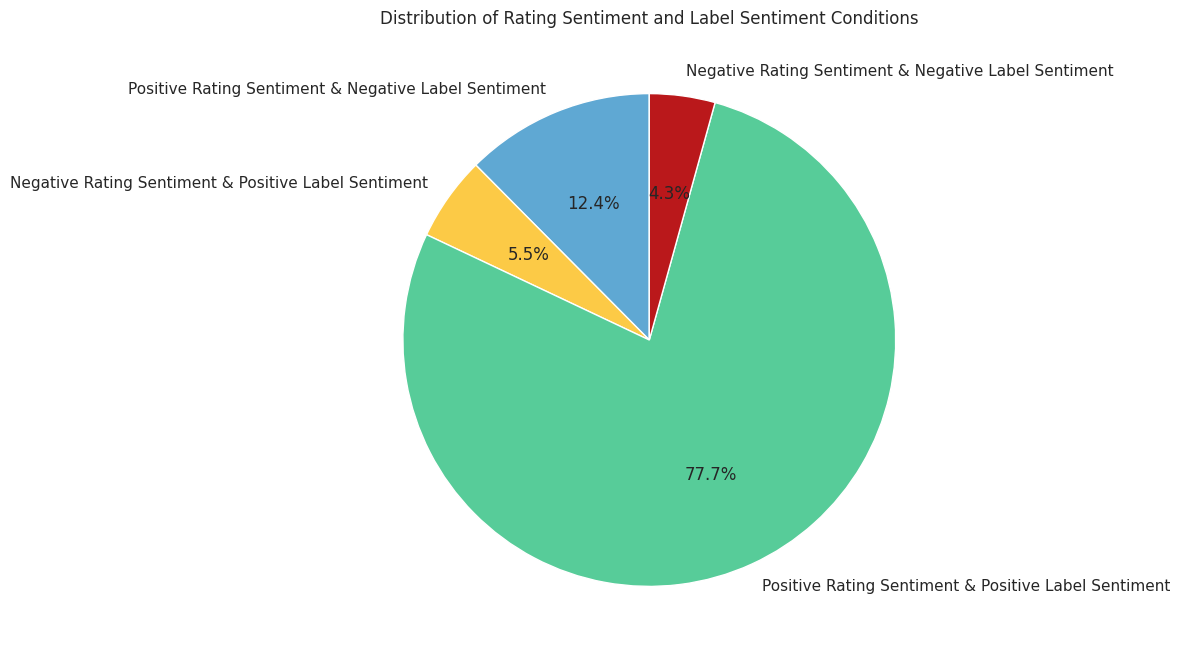

In [ ]:
# Menghitung jumlah data untuk setiap kondisi
conditions = [
    ('Positive Rating Sentiment & Negative Label Sentiment', 'sentiment == 1 and label_sentiment == -1'),
    ('Negative Rating Sentiment & Positive Label Sentiment', 'sentiment == -1 and label_sentiment == 1'),
    ('Positive Rating Sentiment & Positive Label Sentiment', 'sentiment == 1 and label_sentiment == 1'),
    ('Negative Rating Sentiment & Negative Label Sentiment', 'sentiment == -1 and label_sentiment == -1')
]

counts = {label: len(df1.query(condition)) for label, condition in conditions}

# Membuat pie chart
labels = list(counts.keys())
sizes = list(counts.values())
colors = ['#5fa8d3','#fcca46','#57cc99','#ba181b']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Rating Sentiment and Label Sentiment Conditions')
plt.show()

           dateupdated                                               name  \
11 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
24 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
29 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
37 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
42 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   

                                         reviews_text  \
11  When I first started getting the Amazon basic ...   
24  These do not last long at all very cheap batte...   
29  these were under a light we thought they were ...   
37  Just got them so i really wont kno for a few e...   
42  I put these batteries in 10 of the 12 window c...   

                                        reviews_title  reviews_rating  \
11  ... first started getting the Amazon basic bat...               3   
24  ... not last long at all very cheap batterie

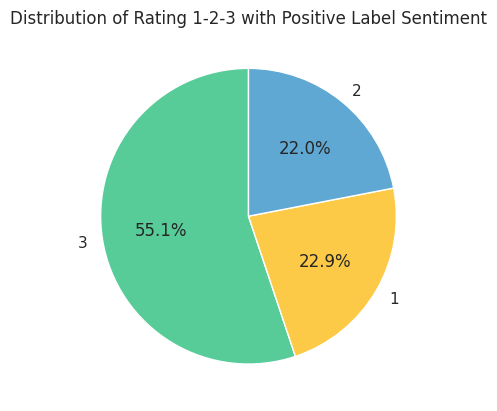

In [ ]:
# check rating 1/2/3 but the label_sentiment is positive

# filter data for reviews_rating  == 1, 2, 3 and label_sentiment == 1
rating_123 = df1.query('(reviews_rating == 3 or reviews_rating == 2 or reviews_rating == 1) and label_sentiment == 1')
df1_rating_123 = pd.DataFrame(rating_123)

# show the filter result
print(df1_rating_123.head())

# create pie chart
rating_counts = df1_rating_123['reviews_rating'].value_counts()
rating_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#57cc99','#fcca46','#5fa8d3'])

plt.title('Distribution of Rating 1-2-3 with Positive Label Sentiment')
plt.ylabel('')  # hide the y-label
plt.show()

In [ ]:
df1_rating_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1567 entries, 11 to 28318
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dateupdated      1567 non-null   datetime64[ns]
 1   name             1567 non-null   object        
 2   reviews_text     1567 non-null   object        
 3   reviews_title    1567 non-null   object        
 4   reviews_rating   1567 non-null   int64         
 5   sentiment        1567 non-null   int64         
 6   Month            1567 non-null   object        
 7   clean_text       1567 non-null   object        
 8   label            1567 non-null   object        
 9   label_sentiment  1567 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 134.7+ KB


           dateupdated                                               name  \
1  2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
22 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
23 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
38 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   
48 2019-04-25 09:08:16  AmazonBasics AAA Performance Alkaline Batterie...   

                                         reviews_text  \
1   Bulk is always the less expensive way to go fo...   
22  They last as long as Duracell batteries in my ...   
23  they seemed to not last as long as other name ...   
38   These last as well as Energizer- half the price.   
48  GOT THE 48 PACK, I USEDD THEM UP FASTER THAN I...   

                                        reviews_title  reviews_rating  \
1   ... always the less expensive way to go for pr...               4   
22  ... my Xbox one controllers and none of them

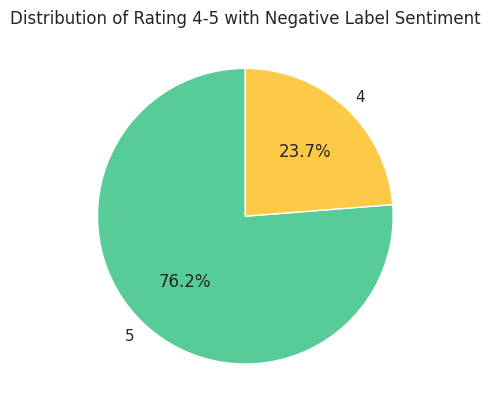

In [ ]:
# check rating 4/5 but the label_sentiment is negative

# filter data for reviews_rating == 4, 5 and label_sentiment == -1
rating_45 = df1.query('(reviews_rating == 4 or reviews_rating == 5) and label_sentiment == -1')
df1_rating_45 = pd.DataFrame(rating_45)

# show the filter result
print(df1_rating_45.head())

# create pie chart
rating_counts = df1_rating_45['reviews_rating'].value_counts()
rating_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#57cc99','#fcca46'])

plt.title('Distribution of Rating 4-5 with Negative Label Sentiment')
plt.ylabel('')  # hide the y-label
plt.show()

In [ ]:
df1_rating_45.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3520 entries, 1 to 28323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dateupdated      3520 non-null   datetime64[ns]
 1   name             3520 non-null   object        
 2   reviews_text     3520 non-null   object        
 3   reviews_title    3520 non-null   object        
 4   reviews_rating   3520 non-null   int64         
 5   sentiment        3520 non-null   int64         
 6   Month            3520 non-null   object        
 7   clean_text       3520 non-null   object        
 8   label            3520 non-null   object        
 9   label_sentiment  3520 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 302.5+ KB


## **6. Modeling**

We create model using clean_text (reviews_text that has been processed) and label_sentiment (sentiment of reviews_text) data.

In [ ]:
# random split train and test data
index = df1.index
df1['random_number'] = np.random.randn(len(index))
train = df1[df1['random_number'] <= 0.8]
test = df1[df1['random_number'] > 0.8]

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['clean_text'], train['label_sentiment'], test_size=0.2, random_state=42)

In [ ]:
# pipeline
from sklearn.pipeline import Pipeline
# vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score

In [ ]:
# model building
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
  # fit pipeline model on training data
  pipeline.fit(X_train, y_train)

  # prediction
  predictions = pipeline.predict(X_test)

  # accuracy score
  accuracy = (accuracy_score(y_test, predictions))*100

  # classification report, f1 score
  class_report = classification_report(predictions, y_test)

  # predicted probability score from the model
  try:
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    # roc auc score
    roc_auc = roc_auc_score(y_test, y_pred_prob) * 100
  except AttributeError:
    print("Probability estimates are not available for this model.")
    roc_auc = None

  return accuracy, class_report, roc_auc

# pipelines -- bow
pipelines_bow = [
  ('Logistic Regression + BoW', Pipeline([
      ('bow', CountVectorizer(token_pattern=r'\b\w+\b')),
      ('lr', LogisticRegression())
  ])),

  ('Multinomial Naive Bayes + BoW', Pipeline([
      ('bow', CountVectorizer(token_pattern=r'\b\w+\b')),
      ('mnb', MultinomialNB())
  ])),

  ('Decision Tree Classifier + BoW', Pipeline([
      ('bow', CountVectorizer(token_pattern=r'\b\w+\b')),
      ('dt', DecisionTreeClassifier(random_state=42))
  ])),

  ('MLP Classifier + BoW', Pipeline([
      ('bow', CountVectorizer(token_pattern=r'\b\w+\b')),
      ('mlp', MLPClassifier())
  ])),

  ('SGD Classifier + BoW', Pipeline([
      ('bow', CountVectorizer(token_pattern=r'\b\w+\b')),
      ('sgd', SGDClassifier())
  ]))
]

#pipelines -- TFIDF
pipelines_tfidf = [
  ('Logistic Regression + TFIDF', Pipeline([
      ('tfidf', TfidfVectorizer()),
      ('lr', LogisticRegression())
  ])),

  ('Multinomial Naive Bayes + TFIDF', Pipeline([
      ('tfidf', TfidfVectorizer()),
      ('mnb', MultinomialNB())
  ])),

  ('Decision Tree Classifier + TFIDF', Pipeline([
      ('tfidf', TfidfVectorizer()),
      ('dt', DecisionTreeClassifier(random_state=42))
  ])),

  ('MLP Classifier + TFIDF', Pipeline([
      ('tfidf', TfidfVectorizer()),
      ('mlp', MLPClassifier())
  ])),

  ('SGD Classifier + TFIDF', Pipeline([
      ('tfidf', TfidfVectorizer()),
      ('sgd', SGDClassifier())
  ]))
]

In [ ]:
# Evaluate models for BoW pipelines
print("Evaluation for BoW Pipelines:")
for model_name, pipeline in pipelines_bow:
    print(f"Evaluation for {model_name}:")
    accuracy, class_report, roc_auc = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    print(f"Accuracy Score: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print(f"ROC AUC Score: {roc_auc}")
    print("\n")

Evaluation for BoW Pipelines:
Evaluation for Logistic Regression + BoW:
Accuracy Score: 97.42614145031334
Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       760
           1       0.98      0.99      0.98      3708

    accuracy                           0.97      4468
   macro avg       0.96      0.95      0.95      4468
weighted avg       0.97      0.97      0.97      4468

ROC AUC Score: 98.98270795139432


Evaluation for Multinomial Naive Bayes + BoW:
Accuracy Score: 87.08594449418085
Classification Report:
              precision    recall  f1-score   support

          -1       0.35      0.70      0.47       366
           1       0.97      0.89      0.93      4102

    accuracy                           0.87      4468
   macro avg       0.66      0.79      0.70      4468
weighted avg       0.92      0.87      0.89      4468

ROC AUC Score: 93.7446083263471


Evaluation for Decision Tree Classifier + BoW

In [ ]:
# Evaluate models for TFIDF pipelines
print("Evaluation for TFIDF Pipelines:")
for model_name, pipeline in pipelines_tfidf:
    print(f"Evaluation for {model_name}:")
    accuracy, class_report, roc_auc = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    print(f"Accuracy Score: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print(f"ROC AUC Score: {roc_auc}")
    print("\n")

Evaluation for TFIDF Pipelines:
Evaluation for Logistic Regression + TFIDF:
Accuracy Score: 95.16562220232765
Classification Report:
              precision    recall  f1-score   support

          -1       0.76      0.93      0.84       587
           1       0.99      0.95      0.97      3881

    accuracy                           0.95      4468
   macro avg       0.87      0.94      0.90      4468
weighted avg       0.96      0.95      0.95      4468

ROC AUC Score: 98.77247643877767


Evaluation for Multinomial Naive Bayes + TFIDF:
Accuracy Score: 84.53446732318712
Classification Report:
              precision    recall  f1-score   support

          -1       0.05      1.00      0.09        34
           1       1.00      0.84      0.92      4434

    accuracy                           0.85      4468
   macro avg       0.52      0.92      0.50      4468
weighted avg       0.99      0.85      0.91      4468

ROC AUC Score: 94.07434567514534


Evaluation for Decision Tree Classifie

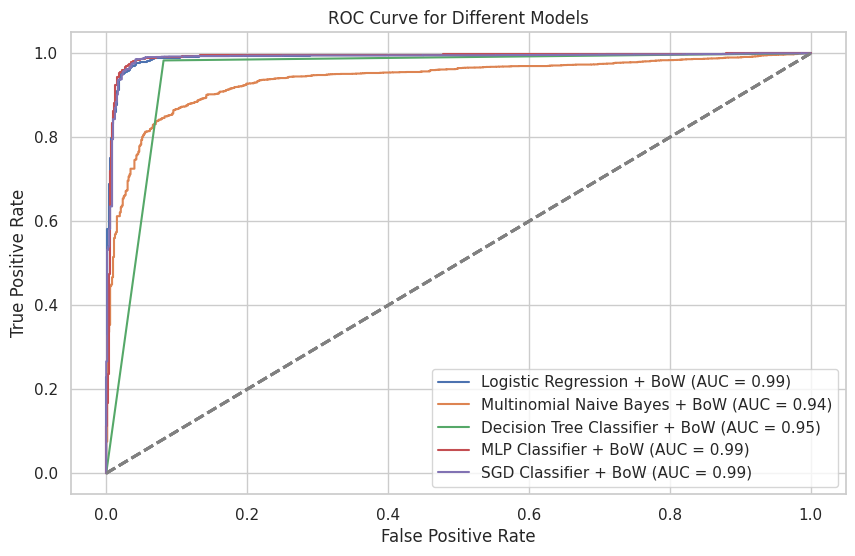

In [ ]:
from sklearn.metrics import roc_curve, auc

# create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# iteration
for model_name, pipeline in pipelines_bow:
    # Fit pipeline model on training data
    pipeline.fit(X_train, y_train)

    # probability
    if hasattr(pipeline, "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_score = pipeline.decision_function(X_test)

    # roc
    fpr, tpr, _ = roc_curve(y_test, y_score)

    # auc
    roc_auc = auc(fpr, tpr)

    # plot roc curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# add tittle and label
ax.set_title('ROC Curve for Different Models')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# add legends
ax.legend()

# show plot
plt.show()

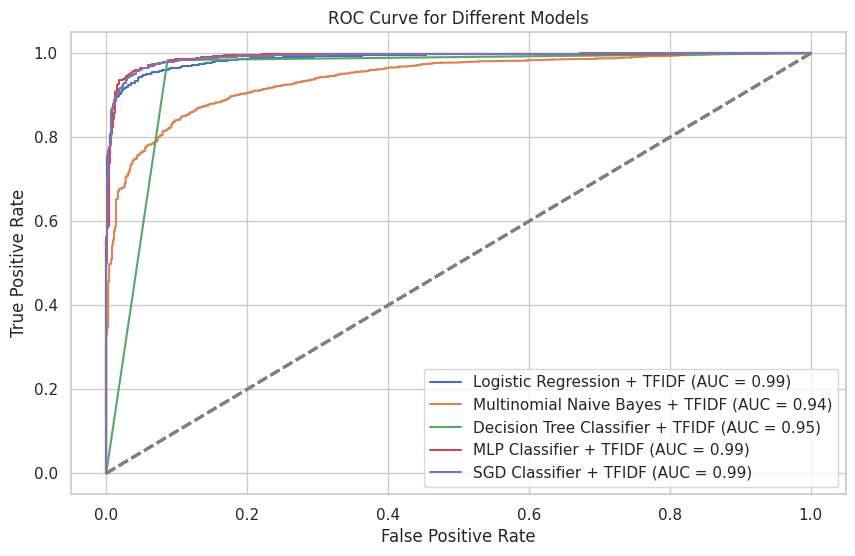

In [ ]:
from sklearn.metrics import roc_curve, auc

# create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# iteration
for model_name, pipeline in pipelines_tfidf:
    # Fit pipeline model on training data
    pipeline.fit(X_train, y_train)

    # probability
    if hasattr(pipeline, "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_score = pipeline.decision_function(X_test)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)

    # AUC
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# add tittle and label
ax.set_title('ROC Curve for Different Models')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# add legends
ax.legend()

# show plot
plt.show()

The differences of models are not very significant.

Priority : higher accuracy --> BoW model

Priorities : the advantages of TF-IDF in dealing with word frequency, or prioritize computing time --> +TFIDF model

##**7. Conclusions**

1. The models used, including Logistic Regression, Multinomial Naive Bayes, Decision Tree Classifier, MLP Classifier, and SGD Classifier, show good performance in predicting sentiment on Amazon product reviews. In general, **the models achieved high accuracy, with most accuracies above 90%**.

2. The **Logistic Regression** obtained quite high F1-Score and ROC AUC Score values, indicating the model's ability **to classify sentiment in a balanced manner between precision and recall, as well as the ability to separate positive and negative classes**.

3. Using Bag of Words or Count Vectorizer and TFIDF Vectorizer show high results. High **TFIDF Vectorizer** result  indicate that giving higher weight to important but infrequent words can help models better understand the context of product reviews.

4. Most product reviews have **positive sentiment**, characterized by high accuracy values and F1-Scores for the positive class.
This shows that the majority of Amazon customers have a **good experience with the products they have reviewed**.

##**8. Recommendations**

1. Logistic Regression as the main model for Amazon product sentiment analysis.

2. Company can use the best models that have been developed to monitor consumer sentiment towards their products in real-time.

3. Company is advised to further analyze the differences between customer’s rating and text review of product.


References:

https://datauab.github.io/sentiment_predictions/

https://www.kaggle.com/code/sunil199/amazon-sentiment-analysis-model-comparison-2019#Summary

https://medium.com/mandiri-engineering/text-preprocessing-tahap-awal-dalam-natural-language-processing-nlp-bc5fbb6606a

https://github.com/mrafifrbbn/steam-reviews-2.0/blob/main/steam_reviews_code.ipynb